In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'C:\Users\Kerry\tweet_sentiment.csv')
print(data.shape)
data.head()

(1000, 2)


,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [14]:
data.isnull().sum()

tweet        0
sentiment    0
dtype: int64

In [15]:
data.duplicated().sum()

982

In [16]:
data.describe()

,tweet,sentiment
count,1000,1000
unique,18,3
top,Fantastic experience!,positive
freq,71,396


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [18]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r"@\w+", "", tweet)     # remove mentions
    tweet = re.sub(r"#\w+", "", tweet)     # remove hashtags
    tweet = re.sub(r"[^A-Za-z\s]", "", tweet)  # remove non-letters
    return tweet.lower()

data['clean_text'] = data['tweet'].astype(str).apply(clean_tweet)
data[['tweet', 'clean_text']].head()


,tweet,clean_text
0,The event starts at 5 PM.,the event starts at pm
1,I hate how this turned out.,i hate how this turned out
2,Fantastic experience!,fantastic experience
3,Fantastic experience!,fantastic experience
4,This is the worst thing ever!,this is the worst thing ever


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Drop rows with missing values
data = data.dropna(subset=['clean_text', 'sentiment'])

# OPTIONAL: Filter to binary classes (if multiple classes)
data = data[data['sentiment'].isin(['positive', 'negative'])]

# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['clean_text'])

# Target labels
y = data['sentiment']

# Ensure X and y are aligned in size
print("X shape:", X.shape)
print("y shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


X shape: (683, 25)
y shape: (683,)
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        57
    positive       1.00      1.00      1.00        80

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



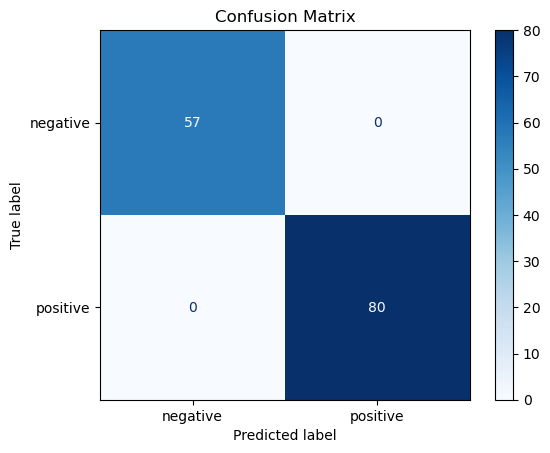

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()